In [62]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [63]:
#print(os.getcwd())
img=image.load_img("Pari/training/happy/th1.jpg")

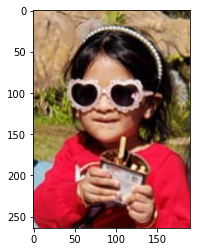

In [64]:
plt.imshow(img)

In [65]:
cv2.imread("Pari/training/happy/th1.jpg").shape

(264, 190, 3)

In [66]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\raman\anaconda3\envs\tf_cpu\python.exe -m pip install --upgrade pip' command.


In [86]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [87]:
train_dataset=train.flow_from_directory('Pari/training',
                                        target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('Pari/validation',
                                        target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 26 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [88]:
train_dataset.class_indices

{'happy': 0, 'not-happy': 1}

In [89]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [90]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [91]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                #
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                  
                                  
                                 ])

In [92]:
model.compile(loss='binary_crossentropy',
              optimizer =RMSprop(lr=0.001),
              metrics  =['accuracy']
             )

In [93]:
model_fit= model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=30,
                    validation_data=validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 397ms/step - loss: 10.8562 - accuracy: 0.2222 - val_loss: 0.6992 - val_accuracy: 0.5333
Epoch 2/30
3/3 [==============================] - 1s 265ms/step - loss: 0.9793 - accuracy: 0.4444 - val_loss: 0.7012 - val_accuracy: 0.5333
Epoch 3/30
3/3 [==============================] - 1s 263ms/step - loss: 0.4736 - accuracy: 0.7778 - val_loss: 0.7364 - val_accuracy: 0.5333
Epoch 4/30
3/3 [==============================] - 1s 260ms/step - loss: 0.7981 - accuracy: 0.4444 - val_loss: 0.6805 - val_accuracy: 0.5333
Epoch 5/30
3/3 [==============================] - 1s 255ms/step - loss: 0.5246 - accuracy: 0.5556 - val_loss: 1.1218 - val_accuracy: 0.4667
Epoch 6/30
3/3 [==============================] - 1s 274ms/step - loss: 0.6496 - accuracy: 0.8750 - val_loss: 0.9556 - val_accuracy: 0.4667
Epoch 7/30
3/3 [==============================] - 1s 253ms/step - loss: 0.6115 - accuracy: 0.8889 - val_loss: 0.9795 - val_accuracy: 0.5333
Epoch 8/30
3/3 [===

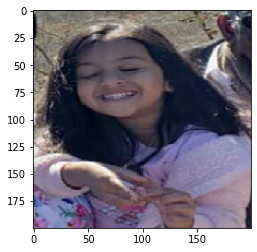

you are happy


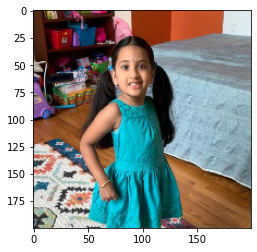

you are not happy


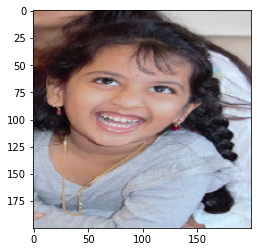

you are not happy


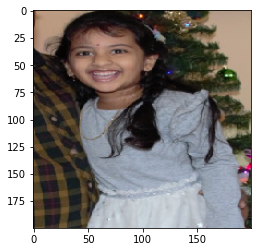

you are happy


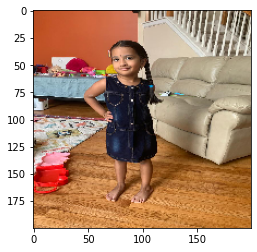

you are not happy


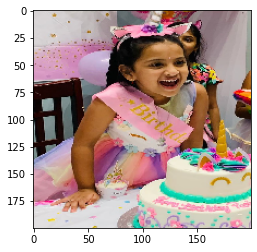

you are not happy


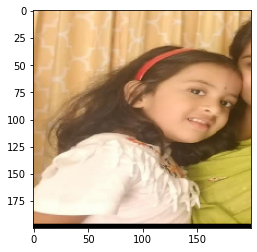

you are not happy


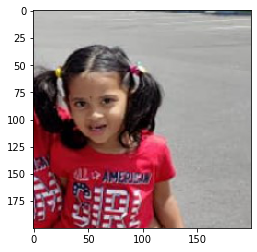

you are happy


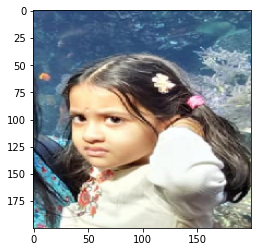

you are happy


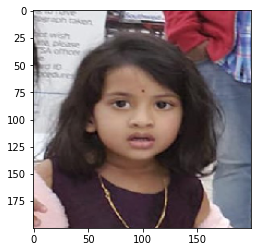

you are happy


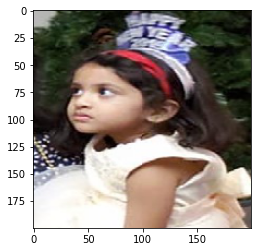

you are not happy


In [94]:
dir_path='Pari/testing'
#dir_path='Not-smiling'
#dir_path='smiling'
for i in os.listdir(dir_path):
    #print ('test' + i)
    img=image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val = model.predict(images)
    if val==1:
        print("you are not happy")
    else:
        print("you are happy")